In [1]:
import sys
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, losses, optimizers
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

2024-04-29 09:49:16.672190: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


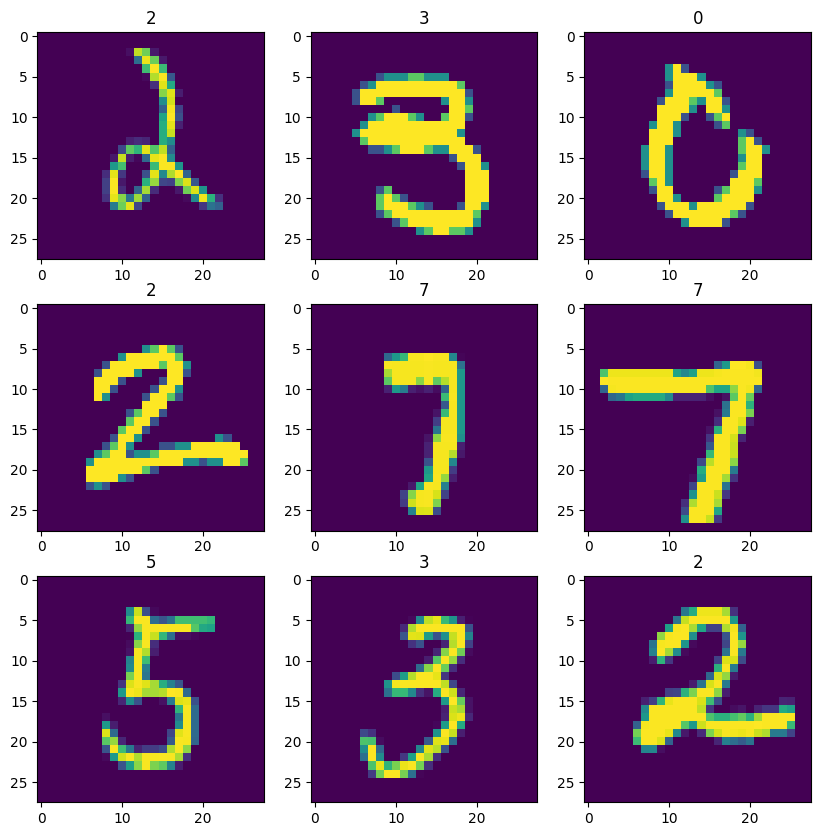

In [2]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

plt.figure(figsize=(10,10))
indexes = np.random.randint(0, len(xTrain), 9)
for i in range(len(indexes)):
    plt.subplot(3,3,i+1)
    plt.imshow(xTrain[indexes[i]])
    plt.title(yTrain[indexes[i]])
plt.show()

In [3]:
numClasses = 10

inputs = layers.Input((28,28,1))
x = layers.Conv2D(6, 5, activation="relu")(inputs)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(16, 5, activation="relu")(x)
x = layers.MaxPool2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(120, activation="relu")(x)
x = layers.Dense(84, activation="relu")(x)
outputs = layers.Dense(numClasses)(x)
leNet5 = keras.Model(inputs=inputs, outputs=outputs)
leNet5.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = optimizers.Adam(),
    metrics = ["accuracy"]
)
leNet5.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0     

2024-04-29 09:49:23.621474: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7141 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:65:00.0, compute capability: 8.6


In [4]:
history = leNet5.fit(xTrain, yTrain, validation_data=(xTest,yTest), batch_size=64, epochs=10)
leNet5.evaluate(xTest, yTest)

Epoch 1/10


2024-04-29 09:49:27.570844: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8907
2024-04-29 09:49:28.192541: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-29 09:49:28.246462: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-04-29 09:49:28.247945: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fb6a0ea7660 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-29 09:49:28.247966: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2024-04-29 09:49:28.251360: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-29 09:49:28.31185

938/938 [==============================] - 7s 3ms/step - loss: 0.4776 - accuracy: 0.9039 - val_loss: 0.1116 - val_accuracy: 0.9670
Epoch 2/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0940 - accuracy: 0.9717 - val_loss: 0.0923 - val_accuracy: 0.9733
Epoch 3/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0671 - accuracy: 0.9792 - val_loss: 0.0592 - val_accuracy: 0.9827
Epoch 4/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0544 - accuracy: 0.9832 - val_loss: 0.0614 - val_accuracy: 0.9805
Epoch 5/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0457 - accuracy: 0.9856 - val_loss: 0.0646 - val_accuracy: 0.9811
Epoch 6/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0415 - accuracy: 0.9872 - val_loss: 0.0564 - val_accuracy: 0.9834
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0378 - accuracy: 0.9875 - val_loss: 0.0803 - val_accuracy: 0.9772
Epoch 8/10
938/93

[0.060983721166849136, 0.9848999977111816]

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score

yPred = leNet5.predict(xTest)
yPred = np.argmax(yPred, axis=-1)

conf = confusion_matrix(yTest, yPred, normalize=None)
accuracy = accuracy_score(yPred, yTest)
print("Accuracy Score:", accuracy)
plt.imshow(conf)
plt.title("Confusion matrix")
plt.show()

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()